<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/distributed%20and%20centralized%20autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [50]:
(x_train, _), (x_test, _) = mnist.load_data()

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
x_train1 = x_train[:,:14,:]
x_train2 = x_train[:,14:28,:]
x_test1 = x_test[:,:14,:]
x_test2 = x_test[:,14:28,:]

(60000, 392)
(10000, 392)
Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1441 - val_loss: 0.0935
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0832 - val_loss: 0.0768
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - val_loss: 0.0737
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0734 - val_loss: 0.0729
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0728 - val_loss: 0.0724
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0725 - val_loss: 0.0722
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723 - val_loss: 0.0721
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - val_loss: 0.0719
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720 - val_loss: 0.0719
Epoch 10/50
1875/1875 [==============================] -

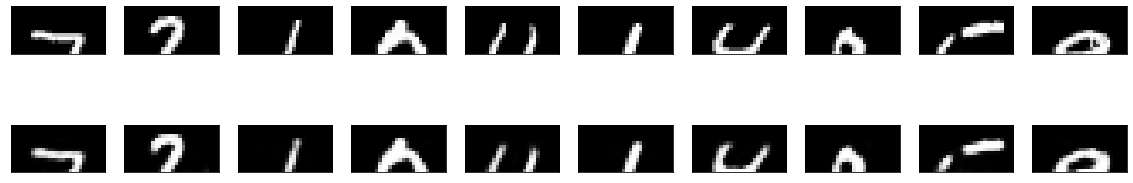

In [53]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(392,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(392, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder1 = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder1.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')
x_train3 = x_train1.astype('float32') / 255.
x_test3 = x_test1.astype('float32') / 255.
#print(np.prod(x_train.shape[1:]))
#print(x_train.shape[1:])
x_train3 = x_train3.reshape((len(x_train3), np.prod(x_train3.shape[1:])))
x_test3 = x_test3.reshape((len(x_test3), np.prod(x_test3.shape[1:])))
print(x_train3.shape)
print(x_test3.shape)
#print(x_train[1])
autoencoder1.fit(x_train3, x_train3,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test3, x_test3))
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test3)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test3[i].reshape(14, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(14, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(60000, 392)
(10000, 392)
Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1547 - val_loss: 0.1007
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0917 - val_loss: 0.0837
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0833 - val_loss: 0.0806
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0814 - val_loss: 0.0795
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0807 - val_loss: 0.0791
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0803 - val_loss: 0.0788
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801 - val_loss: 0.0786
Epoch 8/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0800 - val_loss: 0.0786
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0798 - val_loss: 0.0784
Epoch 10/50
1875/1875 [==============================] -

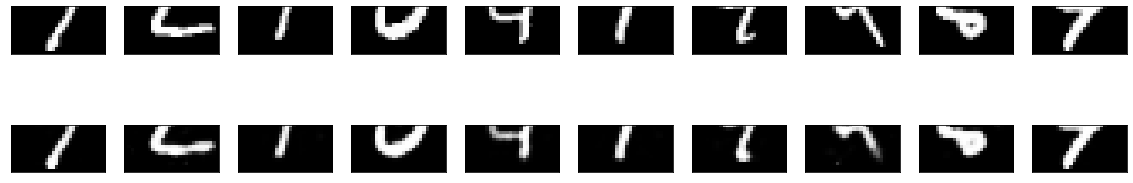

In [54]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(392,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(392, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder2= keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder2.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')
x_train4 = x_train2.astype('float32') / 255.
x_test4 = x_test2.astype('float32') / 255.
#print(np.prod(x_train.shape[1:]))
#print(x_train.shape[1:])
x_train4 = x_train4.reshape((len(x_train4), np.prod(x_train4.shape[1:])))
x_test4 = x_test4.reshape((len(x_test4), np.prod(x_test4.shape[1:])))
print(x_train4.shape)
print(x_test4.shape)
#print(x_train[1])
autoencoder2.fit(x_train4, x_train4,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test4, x_test4))
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test4)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test4[i].reshape(14, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(14, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [55]:
val_loss1 = autoencoder1.history.history['val_loss']
val_loss2 = autoencoder2.history.history['val_loss']
loss1 = autoencoder1.history.history['loss']
loss2 = autoencoder2.history.history['loss']

Text(0, 0.5, 'loss')

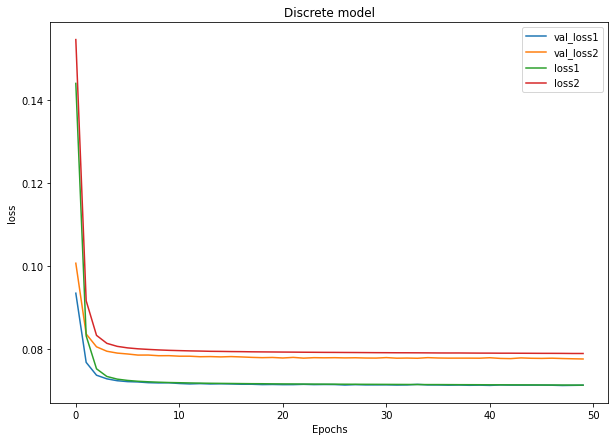

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(val_loss1)
#plt.legend(["val_loss1"])
plt.plot(val_loss2)
#plt.legend(["val_loss2"])
plt.plot(loss1)
#plt.legend(["loss1"])
plt.plot(loss2)
plt.legend(["val_loss1","val_loss2","loss1","loss2"])
plt.title("Discrete model")
plt.xlabel("Epochs")
plt.ylabel("loss")

In [57]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder3 = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder3.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy')
x_train5 = x_train.astype('float32') / 255.
x_test5 = x_test.astype('float32') / 255.
#print(np.prod(x_train.shape[1:]))
#print(x_train.shape[1:])
x_train5 = x_train5.reshape((len(x_train5), np.prod(x_train5.shape[1:])))
x_test5= x_test5.reshape((len(x_test5), np.prod(x_test5.shape[1:])))
print(x_train5.shape)
print(x_test5.shape)
#print(x_train[1])
autoencoder3.fit(x_train5, x_train5,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test5, x_test5))
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test5)
decoded_imgs = decoder.predict(encoded_imgs)


(60000, 784)
(10000, 784)
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1628 - val_loss: 0.1136
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1050 - val_loss: 0.0976
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0970 - val_loss: 0.0944
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0954 - val_loss: 0.0936
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0948 - val_loss: 0.0931
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0945 - val_loss: 0.0931
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0942 - val_loss: 0.0929
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0941 - val_loss: 0.0928
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0940 - val_loss: 0.0928
Epoch 10/50
1875/1875 [==============================] -

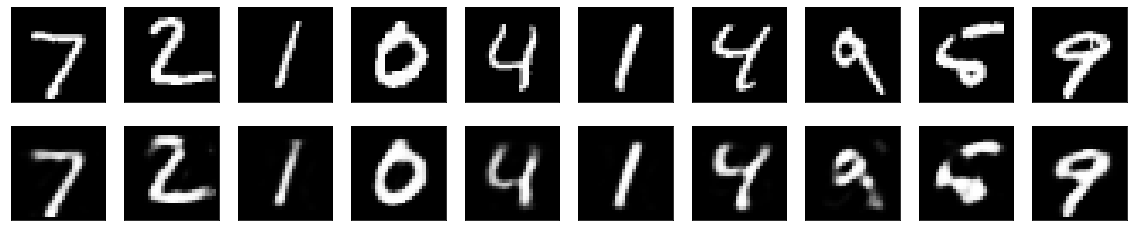

In [58]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test5[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [59]:
val_loss3 = autoencoder3.history.history['val_loss']
loss3 = autoencoder3.history.history['loss']

Text(0, 0.5, 'loss')

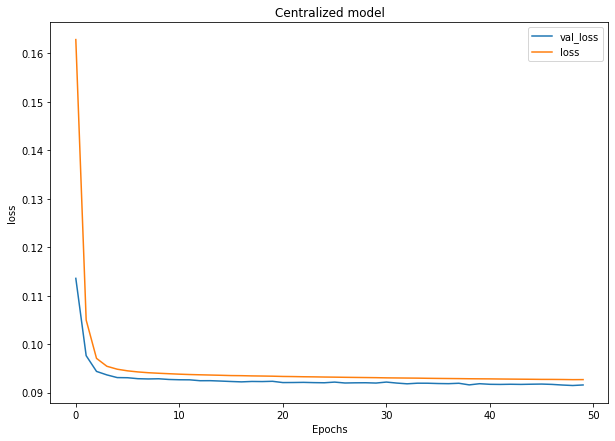

In [60]:
plt.figure(figsize=(10, 7))
plt.plot(val_loss3)
plt.plot(loss3)
plt.legend(["val_loss","loss"])
plt.title("Centralized model")
plt.xlabel("Epochs")
plt.ylabel("loss")

Centralized Vs Discrete

Text(0, 0.5, 'loss')

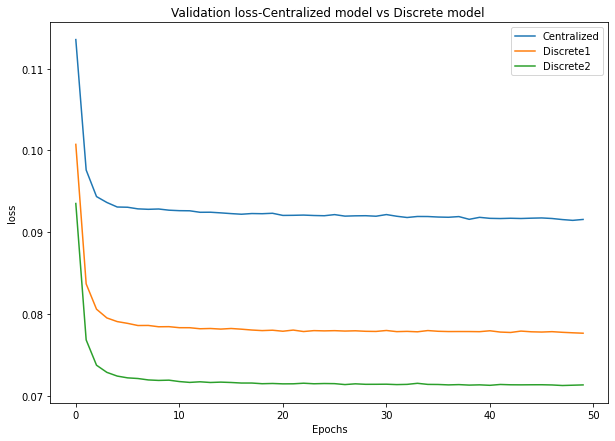

In [61]:
plt.figure(figsize=(10, 7))
plt.plot(val_loss3)
plt.plot(val_loss2)
plt.plot(val_loss1)
plt.legend(["Centralized","Discrete1","Discrete2"])
plt.title("Validation loss-Centralized model vs Discrete model ")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

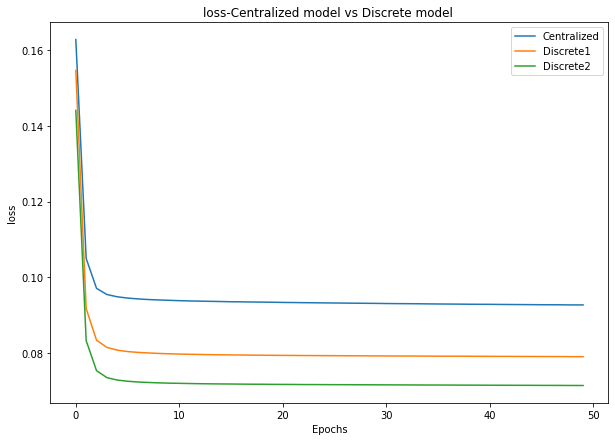

In [62]:
plt.figure(figsize=(10, 7))
plt.plot(loss3)
plt.plot(loss2)
plt.plot(loss1)
plt.legend(["Centralized","Discrete1","Discrete2"])
plt.title("loss-Centralized model vs Discrete model ")
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

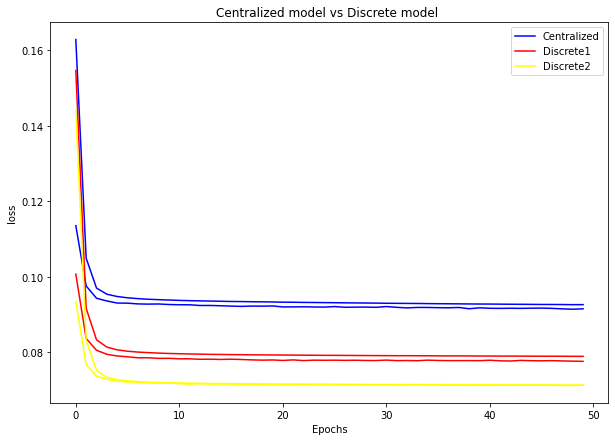

In [63]:
plt.figure(figsize=(10, 7))
plt.plot(val_loss3,color="blue")
plt.plot(val_loss2,color="red")
plt.plot(val_loss1,color="yellow")
plt.plot(loss3,color="blue")
plt.plot(loss2,color="red")
plt.plot(loss1,color="yellow")
plt.legend(["Centralized","Discrete1","Discrete2"])
plt.title("Centralized model vs Discrete model ")
plt.xlabel("Epochs")
plt.ylabel("loss")